In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import math

from collections import OrderedDict

torch.set_printoptions(linewidth=150)

In [4]:
train_set = torchvision.datasets.FashionMNIST(
                root='./data',
                train=True,
                download=True,
                transform=transforms.Compose([
                    transforms.ToTensor()
                ])
                                             )

100.0%

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


111.0%

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw


100.0%

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


159.1%..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw
Processing...
Done!


In [14]:
img, label = train_set[0]
img.shape

torch.Size([1, 28, 28])

In [31]:
type(img)

torch.Tensor

In [30]:
label

9

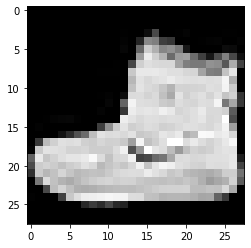

In [17]:
plt.imshow(img.squeeze(),cmap='gray');

In [18]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
in_features = img.numel()
in_features

784

In [20]:
out_features = math.floor(in_features / 2)
out_features

392

In [21]:
out_classes = len(train_set.classes)
out_classes

10

## First Way

In [22]:
network1 = nn.Sequential(
                nn.Flatten(start_dim=1),
                nn.Linear(in_features,out_features),
                nn.Linear(out_features,out_classes)
                )

network1

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [24]:
image = img.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [27]:
network1(image)

tensor([[ 0.0054,  0.0321, -0.1524, -0.0965, -0.1571, -0.0338, -0.1085,  0.1668,  0.1850, -0.0504]], grad_fn=<AddmmBackward>)

## Second Way

In [32]:
layers = OrderedDict([
            ('flatten',nn.Flatten(start_dim=1)),
            ('hidden',nn.Linear(in_features,out_features)),
            ('output',nn.Linear(out_features,out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flatten): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [33]:
network2(image)

tensor([[ 0.0647, -0.0553, -0.1162, -0.0644, -0.0562, -0.1700,  0.2894, -0.1495,  0.0642,  0.1684]], grad_fn=<AddmmBackward>)

In [34]:
torch.manual_seed(50)

network1 = nn.Sequential(
                nn.Flatten(start_dim=1),
                nn.Linear(in_features,out_features),
                nn.Linear(out_features,out_classes)
                )

torch.manual_seed(50)
layers = OrderedDict([
            ('flatten',nn.Flatten(start_dim=1)),
            ('hidden',nn.Linear(in_features,out_features)),
            ('output',nn.Linear(out_features,out_classes))
])

network2 = nn.Sequential(layers)

In [35]:
network1(image),network2(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>))

## Third Way

In [36]:
torch.manual_seed(50)

network3 = nn.Sequential()
network3.add_module('flatten',nn.Flatten(start_dim=1))
network3.add_module('hidden',nn.Linear(in_features,out_features))
network3.add_module('output',nn.Linear(out_features,out_classes))

network3

Sequential(
  (flatten): Flatten()
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [38]:
network1(image),network2(image),network3(image)

(tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>),
 tensor([[ 0.1681,  0.1028, -0.0790, -0.0659, -0.2436,  0.1328, -0.0864,  0.0016,  0.1819, -0.0168]], grad_fn=<AddmmBackward>))

## Class Definition Vs Sequential

In [39]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 12, 5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = t.flatten(start_dim=1)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        
        return t

In [40]:
network = Network()

In [41]:
sequential = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [42]:
sequential

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten()
  (7): Linear(in_features=192, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=60, bias=True)
  (10): ReLU()
  (11): Linear(in_features=60, out_features=10, bias=True)
)

In [43]:
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)